# Support Vector Machine

In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

![title](svm_s.jpg)

## Part 1: Data exploration

### Understand raw data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)# display all the columns
raw_data = pd.read_csv('a_20s_1600_Het_h_0.4MAF_0.2_r_50_EDM-2_01.txt', sep = "\t")# read in dataset

In [2]:
raw_data.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
0,0,0,1,1,0,0,2,0,0,2,2,0,0,1,2,0,1,1,1,1,1
1,0,2,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,1,1,1,1
2,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1
3,0,2,0,1,0,0,0,0,0,1,1,0,0,2,0,0,1,1,1,1,1
4,0,0,1,1,0,0,1,1,0,0,0,0,0,1,1,1,1,1,1,0,1


In [3]:
print ("Number of rows: " + str(raw_data.shape[0])) # row count
print ("Number of columns: " + str(raw_data.shape[1])) # column count

Number of rows: 1600
Number of columns: 21


In [4]:
raw_data.describe() # descriptive statistics 

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000
mean,0.081250,0.719375,0.379375,0.806250,0.072500,0.837500,0.488125,0.653125,0.354375,1.007500,0.515000,0.080625,0.258750,0.83875,0.900000,0.403750,0.530000,0.53000,0.518750,0.516250,0.500000
std,0.275583,0.675211,0.560710,0.691202,0.264173,0.703671,0.611427,0.668455,0.541042,0.715202,0.630495,0.285790,0.477693,0.71191,0.687601,0.569815,0.579275,0.60152,0.581902,0.572224,0.500156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.500000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000


In [5]:
raw_data.isnull().values.any() # check missing data

False

### Understand the features

Text(0,0.5,'Count')

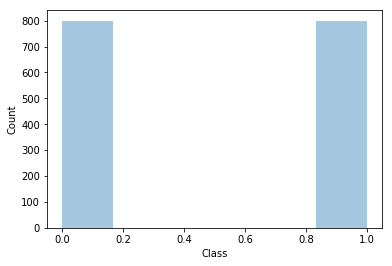

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.distplot(raw_data['Class'],kde=False) # The outcome is labeled as 'class'
plt.ylabel("Count")

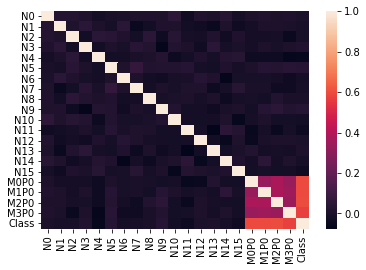

In [7]:
# Use heat map to visualize correlation between each column
corr = raw_data[['N0','N1','N2','N3','N4','N5','N6','N7','N8','N9','N10','N11','N12','N13','N14','N15','M0P0','M1P0','M2P0','M3P0','Class']].corr()
sb.heatmap(corr)

In [29]:
# From heat map, we noticed that N0P0, M1P0, M2P0 and M3P0 are correlated with 'Class'. 

In [8]:
corr

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12,N13,N14,N15,M0P0,M1P0,M2P0,M3P0,Class
N0,1.000000,0.028505,0.027041,0.017031,-0.012241,0.000403,0.002018,0.010503,0.016489,0.009598,0.054169,-0.027643,0.020725,0.006256,0.036304,-0.009907,0.008227,0.019241,0.006094,0.015417,0.004537
N1,0.028505,1.000000,0.010472,0.045569,0.008949,-0.009164,0.044185,-0.043989,-0.022059,0.017311,0.010628,-0.022036,-0.026798,-0.042155,0.009564,-0.032048,-0.014438,0.007653,0.007829,0.004526,-0.004630
N2,0.027041,0.010472,1.000000,-0.023226,0.046411,0.039052,0.014061,-0.019100,0.051320,-0.035171,0.036079,-0.007569,-0.014152,0.020177,-0.026440,0.017467,-0.014845,-0.014296,-0.007439,-0.041641,-0.005575
N3,0.017031,0.045569,-0.023226,1.000000,-0.022348,0.005947,-0.005448,0.042595,0.024844,-0.062843,0.025329,0.009478,-0.028009,0.047040,-0.010527,0.003434,-0.012027,0.009476,-0.004956,0.007965,0.018090
N4,-0.012241,0.008949,0.046411,-0.022348,1.000000,-0.017326,-0.014026,0.000841,0.008281,0.030221,-0.040326,-0.019487,0.014793,-0.010957,0.029609,0.038077,-0.034656,-0.033374,-0.033258,-0.061581,-0.056799
N5,0.000403,-0.009164,0.039052,0.005947,-0.017326,1.000000,0.011501,0.070218,0.019938,0.022306,0.023822,0.030982,-0.008791,-0.016136,0.014218,-0.010957,0.005830,0.032210,0.030356,0.039178,0.031985
N6,0.002018,0.044185,0.014061,-0.005448,-0.014026,0.011501,1.000000,0.009042,-0.020355,-0.024109,-0.006838,0.000114,0.031939,0.014276,-0.062328,-0.005975,-0.005174,-0.004982,-0.012557,-0.028942,-0.015338
N7,0.010503,-0.043989,-0.019100,0.042595,0.000841,0.070218,0.009042,1.000000,-0.012661,0.005445,-0.004711,0.012266,0.012939,-0.040074,-0.007484,0.037897,0.000242,0.000233,-0.033914,-0.031852,-0.010288
N8,0.016489,-0.022059,0.051320,0.024844,0.008281,0.019938,-0.020355,-0.012661,1.000000,-0.006873,0.003657,0.009244,-0.011400,0.007191,-0.039169,-0.009993,-0.007004,-0.016353,0.025563,0.000578,0.001156
N9,0.009598,0.017311,-0.035171,-0.062843,0.030221,0.022306,-0.024109,0.005445,-0.006873,1.000000,0.024714,-0.018259,-0.014836,-0.030787,-0.002289,0.006376,-0.018658,0.032912,0.049251,0.022624,0.033218


## Part 2: Feature Preprocessing

In [12]:
# only keep features:N0P0, M1P0, M2P0 and M3P0
data_clean = raw_data.iloc[:, -5:]

In [13]:
y = data_clean.iloc[:, -1].values 
X = data_clean.iloc[:, :-1].values

In [14]:
# Scale the data 
# All algorithms that are distance based require scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
print ("After feature selection, feature space holds %d observations and %d features" % X.shape)
print ("Unique target labels:", np.unique(y))

After feature selection, feature space holds 1600 observations and 4 features
Unique target labels: [0 1]


## Part 3: Model Training and Result Evaluation

### K-fold Cross-Validation

In [22]:
from sklearn.cross_validation import KFold

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
# This function does 10-fold. It saves the result at each time as different parts of y_pred. 
# In the end, it returns the y_pred as the result of all the 10-fold.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True) # Total number of elements；Number of folds， default=3；Whether to shuffle the data before splitting into batches
    y_pred = y.copy()
    clf = clf_class(**kwargs)
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

### Run SVM Model and Calculate Accuracy

In [20]:
def accuracy(y_true,y_pred):
    return np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

In [24]:
from sklearn.svm import SVC

Classify Using a RBF(Radial Basis Function) Kernel

In [34]:
# In sklearn.svm, default kernal is rbf. Resultes in flexible non-linear decision boundaries
SVM_CV_result_rbf = run_cv(X, y, SVC)
print ("SVM 10-fold cross validation accuracy: " + str(accuracy(y, SVM_CV_result_rbf)))

SVM 10-fold cross validation accuracy: 0.93875


Classify Using a Linear Kernel

In [35]:
# Results in linear decision boundaries
SVM_CV_result_linear = run_cv(X, y, SVC, kernel = 'linear')
print ("SVM 10-fold cross validation accuracy: " + str(accuracy(y, SVM_CV_result_linear)))

SVM 10-fold cross validation accuracy: 0.9075


Classify Using a Polynomial Kernel

In [46]:
# Results in flexible non-linear decision boundaries
SVM_CV_result_poly = run_cv(X, y, SVC, kernel = 'poly')
print ("SVM 10-fold cross validation accuracy: " + str(accuracy(y, SVM_CV_result_poly)))

SVM 10-fold cross validation accuracy: 0.935


SVM with RBF Kernel  had the best performance. Thus, I will continue with RBF Kernel.

### Find Optimal Parameters

It is important to know that an SVC classifier using an RBF kernel has two parameters: gamma and C.

Gamma<br>
Gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points.

C<br>
C is a parameter of the SVC learner and is the penalty for misclassifying a data point. When C is small, the classifier is okay with misclassified data points (high bias, low variance). When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).

![title](bias-variance.png)

![title](biasvariance.png)

In [31]:
def print_grid_search_metrics(grid_search):
    print ("Best score: %0.3f" % grid_search.best_score_)
    print ("Best parameters set:")
    best_parameters = grid_search.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [43]:
from sklearn.grid_search import GridSearchCV
parameters = {
    'C':[0.001, 0.01, 0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 1, 10]    
}
Grid_SVM = GridSearchCV(SVC(),parameters)
Grid_SVM.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [44]:
print_grid_search_metrics(Grid_SVM)

Best score: 0.941
Best parameters set:
	C: 0.1
	gamma: 1


In [45]:
from sklearn.cross_validation import cross_val_score
score = cross_val_score(SVC(C = 0.1, gamma = 1), X, y, cv=10)
print ("SVM 10-fold cross validation accuracy: " + str(np.mean(score)))

SVM 10-fold cross validation accuracy: 0.940625


### Classification Report

In [47]:
from sklearn.metrics import classification_report

In [48]:
SVM_CV_result = run_cv(X, y, SVC,C = 0.1, gamma = 1 )

In [49]:
report = classification_report(y, SVM_CV_result)

In [50]:
print ("Classification Report for SVM model after parameter optimization:\n")
print (report)

Classification Report for SVM model after parameter optimization:

             precision    recall  f1-score   support

          0       0.98      0.90      0.94       800
          1       0.91      0.98      0.94       800

avg / total       0.94      0.94      0.94      1600



Reference:<br>
https://en.wikipedia.org/wiki/Support_vector_machine<br>
https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/<br>
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html<br>
http://scikit-learn.org/stable/modules/svm.html#svm-kernels<br>
